#INTRODUCTION
Market Basket Analysis (MBA) is an accidental transaction pattern that purchasing some products will affect the purchasing of other products. MBA is used to predict what products that customer interested in. It’s a kind of knowledge discovery in data (KDD) and this technique can be applied in various fields of work. The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. By performing this techniques, we could overcome the problem that we faced before. **We will find a patterns that shows which items are frequently purchased together so that we could apply a discounts into a particular items more accurately.**

#Dataset
I will use one of the most commonly-used datasets among data scientists which is online retail data in UK.

In [1]:

!wget --no-check-certificate \
    https://raw.githubusercontent.com/AriesRmd/Market-Basket-Analysis/master/online_retail.csv \
    -O /content/online_retail.csv

--2023-01-06 02:45:31--  https://raw.githubusercontent.com/AriesRmd/Market-Basket-Analysis/master/online_retail.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43857809 (42M) [text/plain]
Saving to: ‘/content/online_retail.csv’

/content/online_ret 100%[===================>]  41.83M   158MB/s    in 0.3s    

2023-01-06 02:45:34 (158 MB/s) - ‘/content/online_retail.csv’ saved [43857809/43857809]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/online_retail.csv', sep=',')

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


this datasets contains 8 features with 525461 rows. It shows us the transaction of an actual online retail in UK from 1 Desember 2009 until 9 Desember 2010. So, it is a whole year transaction data from an actual online retail business.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [6]:
# Check duplikasi pada data
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,12/1/2009 11:34,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,12/1/2009 11:34,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,12/9/2010 13:03,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010 13:24,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,12/9/2010 16:52,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,12/9/2010 18:09,1.25,17965.0,United Kingdom


#Data Cleaning and Preparation

In [7]:
def missing_check(df):
    missing = df.isnull().sum()
    percent = 100*(missing/len(df))
    number_unique = df.nunique()
    data_type = df.dtypes
    return pd.DataFrame({"Missing":missing,
                          "Percent_Missing":percent,
                          "Number_Unique":number_unique,
                          "Data_Types":data_type}).sort_values("Percent_Missing")

In [8]:
#null value 
df = df.dropna()

In [9]:
# check missing value
missing_check(df)

,Missing,Percent_Missing,Number_Unique,Data_Types
Invoice,0,0.0,23587,object
StockCode,0,0.0,4031,object
Description,0,0.0,4459,object
Quantity,0,0.0,500,int64
InvoiceDate,0,0.0,21786,object
Price,0,0.0,664,float64
Customer ID,0,0.0,4383,float64
Country,0,0.0,37,object


##Using the Positive ‘Quantity’ Values

In this datasets, the Quantity column shows us the number of items that are bought in each transaction (InvoiceNo). Sometimes, **the transaction gets cancelled, because this is an online retail**. When there is a cancellation on a particular transaction, it will be datificated in Quantity column as a **negative value**. Since we’re doing market basket analysis, we basically would like to analyze what’s inside the basket that our customer actually bought. This **negative value is not one of them**. That is why we’re not going to use them. As you can see in the picture below, there are only 407695 entries that are not cancelled.

In [10]:
data_plus = df[df['Quantity'] >= 0]
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      407695 non-null  object 
 1   StockCode    407695 non-null  object 
 2   Description  407695 non-null  object 
 3   Quantity     407695 non-null  int64  
 4   InvoiceDate  407695 non-null  object 
 5   Price        407695 non-null  float64
 6   Customer ID  407695 non-null  float64
 7   Country      407695 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ MB


##Data Visualization
Create the Basket Data while Using The Transaction From UK Only

In [16]:
# Pivot data, membuat table baru berisikan kolom is churn dan produk yang telah dipisah menjadi kolom baru, lalu di count jumlahnya
df_piv = df.pivot_table(index = 'Country',values = 'InvoiceDate',aggfunc = 'count', fill_value=0)

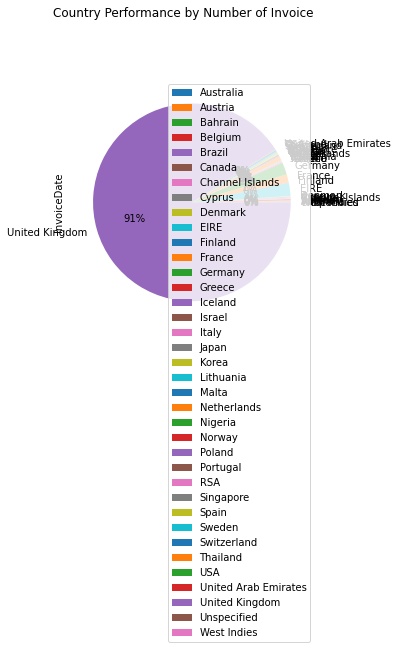

In [17]:
import matplotlib.pyplot as plt
# df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True, figsize = (10, 10), layout = (2,1),
                autopct = '%1.0f%%',
                title = 'Country Performance by Number of Invoice')


plt.show()

As you could see from the visualization above, most of the transaction come from UK (91,5%). So, to make this projects is simpler and more personalized, let’s just limit the data that we will use to only the transaction that come from UK. After we understand why we should only use the transaction from UK, we will be creating the basket data. This basket data will contain the Quantity of each items bought per transaction (InvoiceNo)

In [21]:
basket = (data_plus[data_plus['Country'] == 'United Kingdom'].groupby(['Invoice', 'Description'])
['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

# 1. grouped the data by the transaction (Invoive) & the items (Description) and showed the values ​​of Quantity of each item bought
# 2. sum up the value and unstack it. 
# 3. Lastly I changed the index of the data frame to the Invoice so that we could see the quantity of each item bought per Invoice

In [22]:
basket

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using the positive-quantity-and-the-transaction-from-UK-only data, I grouped the data by the transaction (InvoiveNo) & the items (Description) and showed the values ​​of Quantity of each item bought. After that I sum up the value and unstack it. Lastly I changed the index of the data frame to the InvoiceNo so that we could see the quantity of each item bought per InvoiceNo. **This dataframe is basically the ‘basket’ that our customers ‘carry on’ to the cashier in our shop**. It shows us how much this customer / transaction (InvoiveNo) bought a particular item. **If the number is 0, then this customer didn’t buy that particular item. If it shows another value (12 for instances), it means that the customer has bought as many as 12 items.**

##Data Encoding

created a function called encode that have one particular job; encode the units. That seems obvious. If the units is equal to or less than 0, the function will change it into 0 (Not bought). If the units is more than or equal to 1, it will change the units into 1 (bought)

In [23]:
def encode(x):
  if x <= 0:
    return 0
  if x >= 0:
    return 1

In [24]:
basket_encode = basket.applymap(encode)
basket_encode

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration


##Filter The Transaction : Bought More Than 1 Items Only.

In market basket analysis, we are going to uncover the association between 2 or more items that is bought according to historical data. So, it is less useful if a transaction only bought a single items. I mean, how could we uncover the association between 2 or more items if there is only 1 item bought? Hence, the next step is to filter out the transactions that is bought more than 1 item. Here’s how I did it

In [26]:
filter = basket_encode[(basket_encode > 0).sum(axis=1) >= 2]
filter

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


According to the result above, we could see that there are 16071 transaction that bought more than 1 items. It means, 92.35 % of the basket data is a transaction that is bought more than 1 item

##Apply the Apriori Algorithm
After generating the dataset above, it is now the time for us to use the apriori algorithm. Apriori algorithm is simply used to find the frequently bought items in the dataset.

More about Apriori : https://pub.towardsai.net/association-discovery-the-apriori-algorithm-28c1e71e0f04

In [27]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from mlxtend.frequent_patterns import apriori

In [31]:
frequent_itemsets = apriori(filter, min_support = 0.03,
                            use_colnames = True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [32]:
frequent_itemsets

,support,itemsets,length
0,0.179578,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.092402,(REGENCY CAKESTAND 3 TIER),1
2,0.077842,(ASSORTED COLOUR BIRD ORNAMENT),1
3,0.076784,(STRAWBERRY CERAMIC TRINKET BOX),1
4,0.070500,(HOME BUILDING BLOCK WORD),1
...,...,...,...
86,0.030490,(POTTING SHED TEA MUG),1
87,0.030303,(CREAM CUPID HEARTS COAT HANGER),1
88,0.030241,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2
89,0.030241,(PLASTERS IN TIN SPACEBOY),1


In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 3% out of the whole transaction, it means I will give the support value of 0.03. After that, I added another column called **length that contain the number of item that is bought.**

As you can see that there are 91 transaction that is consider as a frequently bought items. It is shown in the picture that White hanging Heart T-Light Holder is the most frequently bought items with the support value of 0.179578	. It means the item is bought 2884 times out of the whole transaction. (0.179578 * total transaksi 16071 = 2884)

##Finding The Association Between Frequently Bought Items

After applying the apriori algorithm and finding the frequently bought item, it is now the time for us to apply the association rules. From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together. That is the whole point of this project. Here’s how I did it.

In [33]:
from mlxtend.frequent_patterns import association_rules

In [34]:
association_rules(frequent_itemsets, metric='lift',
                  min_threshold = 1).sort_values('lift', ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.049095,0.060855,0.033788,0.688213,11.309069,0.030800,3.012136
1,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.060855,0.049095,0.033788,0.555215,11.309069,0.030800,2.137898
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047415,0.076784,0.036277,0.765092,9.964175,0.032636,3.930114
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.076784,0.047415,0.036277,0.472447,9.964175,0.032636,1.805669
4,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.061166,0.052828,0.030241,0.494405,9.358753,0.027010,1.873380
5,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.052828,0.061166,0.030241,0.572438,9.358753,0.027010,2.195785
6,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.070500,0.057682,0.031921,0.452780,7.849656,0.027854,1.722011
7,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.057682,0.070500,0.031921,0.553398,7.849656,0.027854,2.081273
8,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.179578,0.058739,0.042934,0.239085,4.070274,0.032386,1.237012
9,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058739,0.179578,0.042934,0.730932,4.070274,0.032386,3.049127


From the association_rules results above, we could see that **WOODEN PICTURE FRAME WHITE FINISH** and **WOODEN FRAME ANTIQUE WHITE** are the items that has the highest association each other since these two items has the highest “lift” value. **The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other**. In thise case, the highest value is 11.309 which is very high. It means these 2 items are very good to be sold together.

Beside that, we could also see the support value of WOODEN PICTURE FRAME WHITE FINISH and WOODEN FRAME ANTIQUE WHITE are 0.033788% which means there are 3.37% out of total transaction that these 2 items were sold together. In number, it is 543 times. (3.37% * total transaksi 16071 = 543)

From the confidence, we could even extract more information. 

**Remember that the confidence value is influenced by the antecedent and consequent**. 

**If the antecedent is higher than the consequent, then the rule that will be applied is rule number 1 (not number 2). vice versa**. 

In this case, the antecedent value is higher than the consequent value (wooden pic = 0.049095	and wooden frame = 0.060855). 

It means we will apply rule number 1 which is WOODEN PICTURE FRAME WHITE FINISH → WOODEN FRAME ANTIQUE WHITE. **Artinya orang membeli wooden picture dulu baru beli wooden frame**


In a more detail explanation, it means that a customer will tends to bought WOODEN FRAME ANTIQUE WHITE **AFTER** they bought WOODEN PICTURE FRAME WHITE FINISH. Not in the other way around. 

This could be a very valuable information, because we are now aware which products should we put the discounts on. We could give a discounts on WOODEN FRAME ANTIQUE WHITE if a customer buy WOODEN PICTURE FRAME WHITE FINISH.